In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import joblib
import math
import numpy as np
from itertools import product
from collections import Counter
import garpar as gp


In [2]:
mer = joblib.load("./until_2025-05-17.pklj")
mer= mer[6000:6252]
mer = mer.drop(columns=['BRIO', 'BRIO6','EDLH','EMDE','ESME','INAG','IRCP','PGR'])
mer = mer.ffill()
mer = mer.infer_objects(copy=False)
pd.set_option('future.no_silent_downcasting', True)
mer

/tmp/ipykernel_16192/3343783768.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mer = mer.ffill()


,ALUA,BBAR,BMA,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,...,MORI,MTR,OEST,PATA,POLL,RICH,RIGO,SAMI,SEMI,TGLT
2024-05-07,870.0,4001.0,6900.05,1689.0,1205.0,115.25,1127.0,4890.0,1104.55,3902.5,...,178.0,1520.0,1064.0,969.0,460.0,933.0,918.5,822.0,102.25,30.70
2024-05-08,858.5,3850.0,6922.50,1660.0,1172.8,118.30,1101.0,4842.5,1081.00,3846.0,...,173.5,1460.0,1040.0,961.5,460.0,920.0,918.5,800.0,100.00,29.50
2024-05-09,848.0,3774.0,6880.00,1618.0,1162.0,121.50,1076.0,4799.0,1097.00,3760.0,...,166.0,1399.0,1015.0,956.5,460.0,913.0,880.0,799.5,96.90,28.25
2024-05-10,918.5,3721.0,6814.00,339.5,1120.0,119.95,1058.0,4785.0,1087.00,3738.0,...,175.0,1403.0,1048.0,1000.0,450.0,893.5,915.0,825.0,99.70,29.40
2024-05-13,885.0,3650.0,6605.00,325.0,1080.0,132.00,1025.9,4719.0,1027.00,3712.0,...,166.0,1417.0,1044.5,998.0,450.0,867.0,915.0,800.0,99.50,29.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-12,620.0,8290.0,10700.00,390.0,1430.0,143.50,1345.0,6490.0,1965.00,7290.0,...,272.0,2390.0,778.0,1450.0,305.0,1445.0,800.0,646.0,27.55,21.10
2025-05-13,659.0,8480.0,10775.00,392.5,1470.0,159.75,1355.0,6550.0,2075.00,7300.0,...,265.0,2360.0,802.0,1440.0,305.0,1405.0,800.0,662.0,27.00,21.35
2025-05-14,680.0,8510.0,10850.00,408.0,1520.0,174.00,1340.0,6600.0,2085.00,7220.0,...,270.0,2415.0,807.0,1480.0,300.0,1430.0,810.0,699.0,27.20,22.00
2025-05-15,683.0,8300.0,10775.00,406.0,1540.0,174.75,1345.0,6760.0,2080.00,7190.0,...,269.5,2485.0,815.0,1465.0,300.0,1500.0,790.0,667.0,27.25,22.70


In [38]:
# mervalf = gp.datasets.load_MERVAL(    first="07-29-2021", last = "07-29-2022")
base12 = gp.StocksSet.from_prices(
        mer,
        weights=None,
        title="2025Merval12m",
        description=("Argentine stock market prices") )
base9 = gp.StocksSet.from_prices(
        mer[69:252],
        weights=None,
        title="2025Merval9m",
        description=("Argentine stock market prices") )
base6 = gp.StocksSet.from_prices(
        mer[132:252],
        weights=None,
        title="2025Merval6m",
        description=("Argentine stock market prices") )
base3 = gp.StocksSet.from_prices(
        mer[194:252],
        weights=None,
        title="2025Merval3m",
        description=("Argentine stock market prices") )


Text(0, 0.5, 'Varianza')

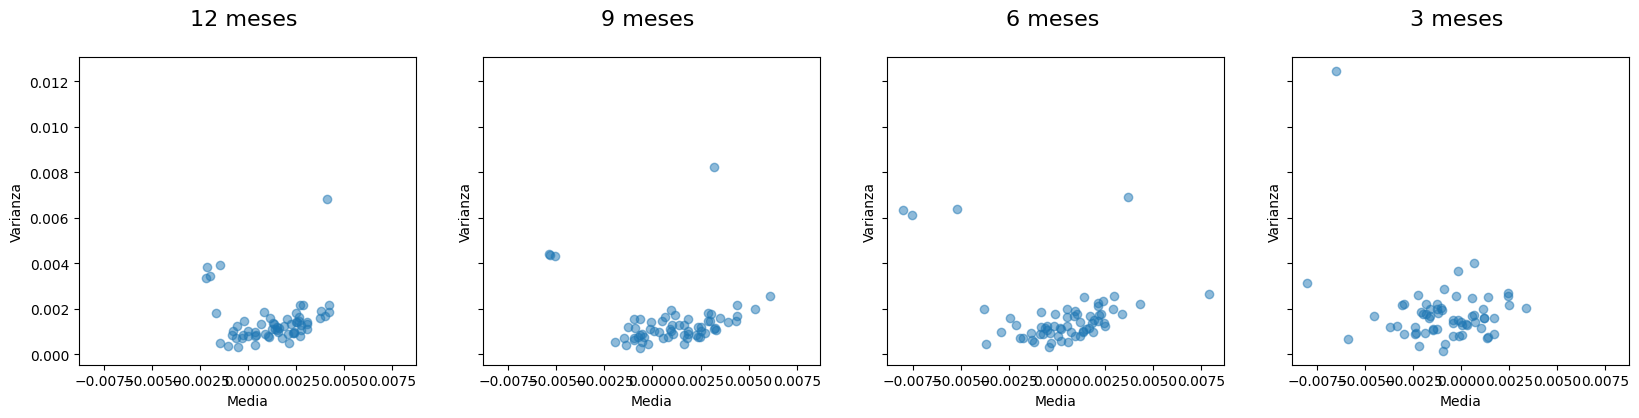

In [49]:
 base12..to_frame?

Object `base12.to_frame` not found.


In [38]:
ms = gp.optimize.mean_variance.MVOptimizer( model='max_sharpe')
sharpe12 = ms.optimize(base12)
sharpe9 = ms.optimize(base9)
sharpe6 = ms.optimize(base6)
sharpe3 = ms.optimize(base3)

/home/nadia/carteras/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")
/home/nadia/carteras/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")
/home/nadia/carteras/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")
/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/home/nadia/carteras/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")


In [6]:
wsharpe12 = sharpe12.weights_prune().weights.to_frame()
wsharpe12.rename(columns={'Weights': 'Weights Sharpe 12'}, inplace=True)
wsharpe9 = sharpe9.weights_prune().weights.to_frame()
wsharpe6 = sharpe6.weights_prune().weights.to_frame()
wsharpe6.rename(columns={'Weights': 'Weights Sharpe 6'}, inplace=True)
wsharpe3 = sharpe3.weights_prune().weights_prune().weights.to_frame()
wsharpe3.rename(columns={'Weights': 'Weights Sharpe 3'}, inplace=True)

In [7]:
wsharpe = pd.concat([wsharpe12, wsharpe9, wsharpe6, wsharpe3], axis=1)
wsharpe = wsharpe.fillna(0)
wsharpe

,Weights Sharpe 12,Weights,Weights Sharpe 6,Weights Sharpe 3
Stocks,,,,
MIRG,0.036487,0.000000,0.000000,0.000000
SUPV,0.175968,0.000000,0.000000,0.000000
DYCA,0.227445,0.344111,0.000000,0.000000
GARO,0.180358,0.094999,0.800629,0.000000
GRIM,0.121744,0.000000,0.092562,0.278334
METR,0.203482,0.304549,0.000000,0.000000
RICH,0.054516,0.025454,0.000000,0.000000
BBAR,0.000000,0.009888,0.000000,0.000000
GCLA,0.000000,0.220998,0.106809,0.079955


In [12]:
mk = gp.optimize.mean_variance.Markowitz(target_return=0.01)
marko12_mean= mk.optimize(base12)
marko9_mean= mk.optimize(base9)
marko6_mean= mk.optimize(base6)
marko3_mean= mk.optimize(base3)


/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


In [13]:
wmarko12_mean = marko12_mean.weights_prune().weights.to_frame()
wmarko12_mean.rename(columns={'Weights': 'Weights Mark(r) 12'}, inplace=True)
wmarko9_mean = marko9_mean.weights_prune().weights.to_frame()
wmarko9_mean.rename(columns={'Weights': 'Weights Mark(r) 9'}, inplace=True)
wmarko6_mean = marko6_mean.weights_prune().weights.to_frame()
wmarko6_mean.rename(columns={'Weights': 'Weights Mark(r) 6'}, inplace=True)
wmarko3_mean = marko3_mean.weights_prune().weights.to_frame()
wmarko3_mean.rename(columns={'Weights': 'Weights Mark(r) 3'}, inplace=True)

In [14]:
wmarko_mean = pd.concat([wmarko12_mean, wmarko9_mean, wmarko6_mean, wmarko3_mean], axis=1)
wmarko_mean = wmarko_mean.fillna(0)
wmarko_mean

,Weights Mark(r) 12,Weights Mark(r) 9,Weights Mark(r) 6,Weights Mark(r) 3
Stocks,,,,
MIRG,0.070236,0.124641,0.098579,0.042601
VALO,0.071843,0.042582,0.000000,0.000000
CADO,0.163119,0.170733,0.217814,0.000000
DYCA,0.007496,0.004075,0.013776,0.000000
GAMI,0.105089,0.106749,0.094511,0.000000
GARO,0.036172,0.025531,0.040801,0.000000
GCLA,0.057047,0.035986,0.038738,0.056742
GRIM,0.074287,0.080969,0.067890,0.097908
INTR,0.036635,0.023179,0.016213,0.006933


In [15]:
mk = gp.optimize.mean_variance.Markowitz(target_return=0.02)
marko12_mean2= mk.optimize(base12)
marko9_mean2= mk.optimize(base9)
marko6_mean2= mk.optimize(base6)
marko3_mean2= mk.optimize(base3)

/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


In [16]:
wmarko12_mean2 = marko12_mean2.weights_prune().weights.to_frame()
wmarko12_mean2.rename(columns={'Weights': 'Weights Mark(r) 12'}, inplace=True)
wmarko9_mean2 = marko9_mean2.weights_prune().weights.to_frame()
wmarko9_mean2.rename(columns={'Weights': 'Weights Mark(r) 9'}, inplace=True)
wmarko6_mean2 = marko6_mean2.weights_prune().weights.to_frame()
wmarko6_mean2.rename(columns={'Weights': 'Weights Mark(r) 6'}, inplace=True)
wmarko3_mean2 = marko3_mean2.weights_prune().weights.to_frame()
wmarko3_mean2.rename(columns={'Weights': 'Weights Mark(r) 3'}, inplace=True)

In [17]:
wmarko_mean2 = pd.concat([wmarko12_mean2, wmarko9_mean2, wmarko6_mean2, wmarko3_mean2], axis=1)
wmarko_mean2 = wmarko_mean2.fillna(0)
wmarko_mean2

,Weights Mark(r) 12,Weights Mark(r) 9,Weights Mark(r) 6,Weights Mark(r) 3
Stocks,,,,
MIRG,0.070236,0.126193,0.098304,0.040245
VALO,0.071843,0.041667,0.000000,0.000000
CADO,0.163119,0.168199,0.216878,0.000000
DYCA,0.007496,0.005770,0.013840,0.000000
GAMI,0.105089,0.104931,0.094011,0.000000
GARO,0.036172,0.026521,0.042730,0.000000
GCLA,0.057047,0.037434,0.039361,0.058458
GRIM,0.074287,0.081372,0.068518,0.102171
INTR,0.036635,0.022309,0.015599,0.003014


In [18]:
mk = gp.optimize.mean_variance.Markowitz(target_return=0.03)
marko12_mean3= mk.optimize(base12)
marko9_mean3= mk.optimize(base9)
marko6_mean3= mk.optimize(base6)
marko3_mean3= mk.optimize(base3)

/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


In [19]:
wmarko12_mean3 = marko12_mean3.weights_prune().weights.to_frame()
wmarko12_mean3.rename(columns={'Weights': 'Weights Mark(r) 12'}, inplace=True)
wmarko9_mean3 = marko9_mean3.weights_prune().weights.to_frame()
wmarko9_mean3.rename(columns={'Weights': 'Weights Mark(r) 9'}, inplace=True)
wmarko6_mean3 = marko6_mean3.weights_prune().weights.to_frame()
wmarko6_mean3.rename(columns={'Weights': 'Weights Mark(r) 6'}, inplace=True)
wmarko3_mean3 = marko3_mean3.weights_prune().weights.to_frame()
wmarko3_mean3.rename(columns={'Weights': 'Weights Mark(r) 3'}, inplace=True)

In [20]:
wmarko_mean3 = pd.concat([wmarko12_mean3, wmarko9_mean3, wmarko6_mean3, wmarko3_mean3], axis=1)
wmarko_mean3 = wmarko_mean3.fillna(0)
wmarko_mean3

,Weights Mark(r) 12,Weights Mark(r) 9,Weights Mark(r) 6,Weights Mark(r) 3
Stocks,,,,
MIRG,0.070236,0.127744,0.097965,0.037636
VALO,0.071843,0.040751,0.000000,0.000000
CADO,0.163119,0.165665,0.215870,0.000000
DYCA,0.007496,0.007465,0.013964,0.000000
GAMI,0.105089,0.103113,0.093625,0.000000
GARO,0.036172,0.027511,0.044674,0.000000
GCLA,0.057047,0.038882,0.039975,0.059996
GRIM,0.074287,0.081775,0.069136,0.106547
INTR,0.036635,0.021439,0.014984,0.000000


In [91]:
mk = gp.optimize.mean_variance.Markowitz(target_risk=0.30)
marko12_risk= mk.optimize(base12)
marko9_risk= mk.optimize(base9)
marko6_risk= mk.optimize(base6)
marko3_risk= mk.optimize(base3)


/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


In [92]:
wmarko12_risk = marko12_risk.weights_prune().weights.to_frame()
wmarko12_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 12'}, inplace=True)
wmarko9_risk = marko9_risk.weights_prune().weights.to_frame()
wmarko9_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 9'}, inplace=True)
wmarko6_risk = marko6_risk.weights_prune().weights.to_frame()
wmarko6_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 6'}, inplace=True)
wmarko3_risk = marko3_risk.weights_prune().weights.to_frame()
wmarko3_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 3'}, inplace=True)


In [94]:
wmarko_risk = pd.concat([wmarko12_risk, wmarko9_risk, wmarko6_risk, wmarko3_risk], axis=1)
wmarko_risk = wmarko_risk.fillna(0)
wmarko_risk.round(6)

,Weights Mark(riesgo) 12,Weights Mark(riesgo) 9,Weights Mark(riesgo) 6,Weights Mark(riesgo) 3
Stocks,,,,
BBAR,0.000000,0.000000,0.000000,0.000000
MIRG,0.229219,0.150156,0.062977,0.000000
SUPV,0.062900,0.000000,0.000000,0.000000
DYCA,0.161669,0.181090,0.019444,0.000000
GARO,0.144483,0.093303,0.286988,0.000000
GCLA,0.000000,0.184138,0.112653,0.081073
GRIM,0.167537,0.078548,0.132957,0.292246
METR,0.104526,0.115388,0.000000,0.000000
MTR,0.052113,0.028143,0.000000,0.167635


Text(0, 0.5, 'Varianza')

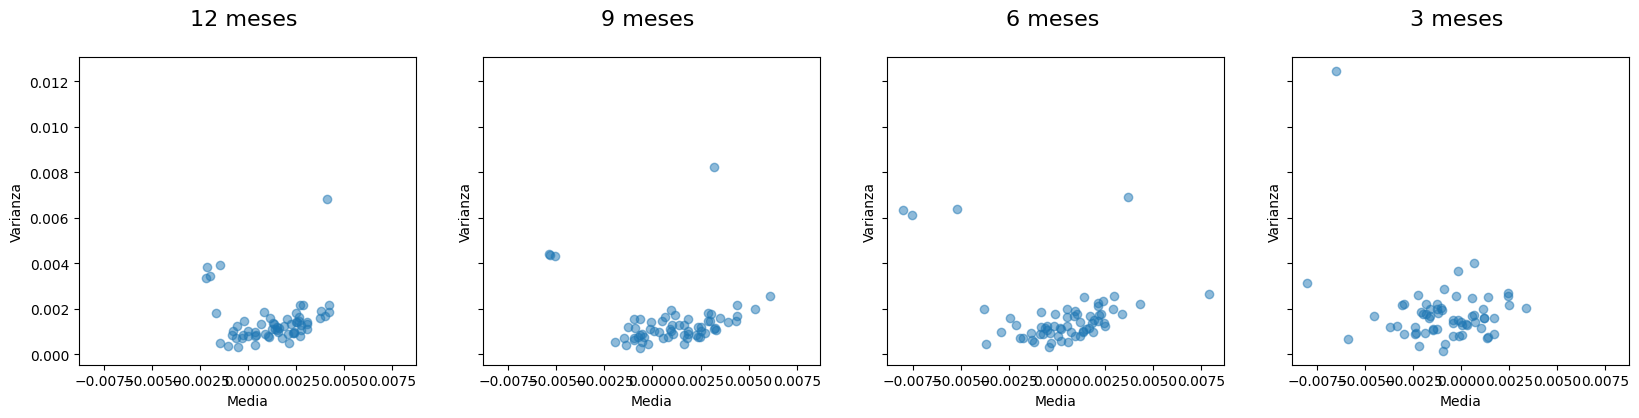

In [88]:
# Diagramas de dispersion con envolvente carteras
rmeanbase12 = base12.as_returns().mean().to_frame()
rvariance12 = base12.as_returns().std().to_frame()*base12.as_returns().std().to_frame()
mvbase12 = pd.concat([rmeanbase12,rvariance12],axis=1)
rmeanbase9 = base9.as_returns().mean().to_frame()
rvariance9 = base9.as_returns().std().to_frame()*base9.as_returns().std().to_frame()
mvbase9 = pd.concat([rmeanbase9,rvariance9],axis=1)
rmeanbase6 = base6.as_returns().mean().to_frame()
rvariance6 = base6.as_returns().std().to_frame()*base6.as_returns().std().to_frame()
mvbase6 = pd.concat([rmeanbase6,rvariance6],axis=1)
rmeanbase3 = base3.as_returns().mean().to_frame()
rvariance3 = base3.as_returns().std().to_frame()*base3.as_returns().std().to_frame()
mvbase3 = pd.concat([rmeanbase3,rvariance3],axis=1)

fig, ax = plt.subplots(1, 4, sharey=True, sharex=True)
fig.set_size_inches(20, 4)
#12 meses
x12 = np.array(base12.as_returns().mean().to_frame())
y12 = np.array(base12.as_returns().std().to_frame()*base12.as_returns().std().to_frame())
ax[0].scatter(x12, y12,  alpha = 0.5)
ax[0].set_title(f"12 meses \n ", fontsize=16)
ax[0].set_xlabel("Media")
ax[0].set_ylabel("Varianza")

#9 meses
x9 = np.array(base9.as_returns().mean().to_frame())
y9 = np.array(base9.as_returns().std().to_frame()*base9.as_returns().std().to_frame())
ax[1].scatter(x9, y9,  alpha = 0.5)
ax[1].set_title(f"9 meses \n ", fontsize=16)
ax[1].set_xlabel("Media")
ax[1].set_ylabel("Varianza")


#6 meses
x6 = np.array(base6.as_returns().mean().to_frame())
y6 = np.array(base6.as_returns().std().to_frame()*base6.as_returns().std().to_frame())
ax[2].scatter(x6, y6,  alpha = 0.5)
ax[2].set_title(f"6 meses \n ", fontsize=16)
ax[2].set_xlabel("Media")
ax[2].set_ylabel("Varianza")

#9 meses
x3 = np.array(base3.as_returns().mean().to_frame())
y3 = np.array(base3.as_returns().std().to_frame()*base3.as_returns().std().to_frame())
ax[3].scatter(x3, y3,  alpha = 0.5)
ax[3].set_title(f"3 meses \n ", fontsize=16)
ax[3].set_xlabel("Media")
ax[3].set_ylabel("Varianza")
# plt.show()